In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset

from datasets import load_dataset
dataset = load_dataset ("rotten_tomatoes")
train_data = dataset ['train']
val_data = dataset ['validation' ]
test_data = dataset ['test']

# Inspect the data
print(train_data.head())

AttributeError: 'Dataset' object has no attribute 'head'

In [4]:
#preprocess the test 
# Set parameters
MAX_NUM_WORDS = 20000  # Vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Maximum sequence length for each text input

# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train_data['text'])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_data['text'])
X_val = tokenizer.texts_to_sequences(val_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

# Pad sequences to ensure uniform input shape
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Prepare labels
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

In [6]:

# Path to the GloVe embeddings file
GLOVE_PATH = 'C:\\Users\\Lee Ming Jia\\Desktop\\GloVe\\glove.6B.100d.txt'
EMBEDDING_DIM = 100

# Load the GloVe embeddings
embeddings_index = {}
with open(GLOVE_PATH, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

# Prepare the embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_NUM_WORDS:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [7]:
# Build the model
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, 
              output_dim=EMBEDDING_DIM, 
              weights=[embedding_matrix], 
              input_length=MAX_SEQUENCE_LENGTH,
              trainable=False),  # Freeze embeddings
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Lee Ming Jia\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [10]:
# Convert y_train to numpy array
y_train = np.array(y_train)
print("X_train shape:", X_train.shape)  # Should be (num_samples, MAX_SEQUENCE_LENGTH)
print("y_train shape:", y_train.shape)    # Should match the number of samples in X_train

X_train shape: (8530, 100)
y_train shape: (8530,)


In [12]:
print(type(X_train))  # Should be <class 'numpy.ndarray'>
print(X_train.shape)  # Should be (num_samples, 100)

<class 'numpy.ndarray'>
(8530, 100)


In [14]:
print("X_train dtype:", X_train.dtype)  # Should be float32

X_train dtype: int32


In [15]:
# Convert to float32 if necessary
X_train = X_train.astype('float32')

In [17]:
print("X_train dtype:", X_train.dtype)  # Should be float32
print("y_train dtype:", type(y_train))   # Should be a NumPy array or a list

X_train dtype: float32
y_train dtype: <class 'numpy.ndarray'>


In [18]:
print("y_train shape:", y_train.shape) 

y_train shape: (8530,)


In [19]:
print("Unique classes in y_train:", np.unique(y_train))

Unique classes in y_train: [0 1]


In [20]:
print("X_val dtype:", X_val.dtype)  # Should also be float32
print("y_val shape:", y_val.shape)    # Should match the expected shape for y_train

X_val dtype: int32


AttributeError: 'list' object has no attribute 'shape'

In [21]:
y_val = np.array(y_val)  # Convert y_val to a numpy array

In [22]:
print("y_val shape:", y_val.shape) 

y_val shape: (1066,)


In [23]:
print("X_val dtype:", X_val.dtype)  # Should ideally be float32
print("y_val dtype:", y_val.dtype)   # Should be int (for class labels) or float32 (if one-hot encoded)

X_val dtype: int32
y_val dtype: int32


In [24]:
X_val = X_val.astype('float32')  # Convert to float32 if necessary


In [25]:
print("Unique classes in y_val:", np.unique(y_val))  # Check the classes


Unique classes in y_val: [0 1]


In [26]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8455 - loss: 0.3701 - val_accuracy: 0.7345 - val_loss: 0.5621
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8937 - loss: 0.2689 - val_accuracy: 0.7458 - val_loss: 0.5610
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9263 - loss: 0.1960 - val_accuracy: 0.7355 - val_loss: 0.6347
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9567 - loss: 0.1256 - val_accuracy: 0.7392 - val_loss: 0.7470
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9651 - loss: 0.1001 - val_accuracy: 0.7411 - val_loss: 0.7771
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9762 - loss: 0.0769 - val_accuracy: 0.7289 - val_loss: 0.9050
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9892 - loss: 0.0377 - val_accuracy: 0.6811 - val_loss: 1.2547
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9840 - loss: 0.0509 - val

In [28]:
print("X_test dtype:", X_test.dtype)
print("y_test dtype:", y_test.dtype)

X_test dtype: int32


AttributeError: 'list' object has no attribute 'dtype'

In [29]:
y_test = np.array(y_test).astype(np.int32)  # Convert to integer numpy array
X_test = X_test.astype(np.float32)

print("X_test dtype:", X_test.dtype)  # Should be float32
print("X_test shape:", X_test.shape)  # Should be (num_samples, MAX_SEQUENCE_LENGTH)
print("y_test dtype:", y_test.dtype)  # Should be int32
print("y_test shape:", y_test.shape)  # Should be (num_samples,)

X_test dtype: float32
X_test shape: (1066, 100)
y_test dtype: int32
y_test shape: (1066,)


In [30]:
# Evaluate on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Classification report
print(classification_report(y_test, y_pred))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7212 - loss: 1.2942
Test Accuracy: 0.7298
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       533
           1       0.73      0.72      0.73       533

    accuracy                           0.73      1066
   macro avg       0.73      0.73      0.73      1066
weighted avg       0.73      0.73      0.73      1066



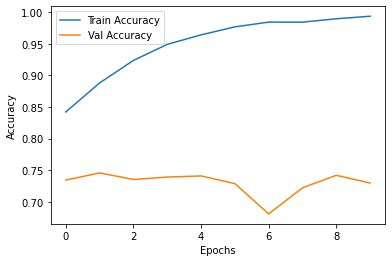

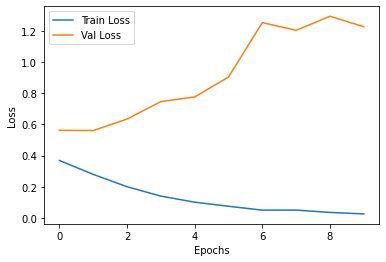

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()